# Librerias

In [1]:
import pandas as pd
import glob
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

periodos=[201901, 201902, 201903, 201904, 201905, 201906, 201907,201908, 201909, 201910, 201911, 201912,
          202001, 202002, 202003,202004, 202005, 202006, 202007] #Para iterar
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(path)
os.getcwd()#os.listdir()

'C:\\Users\\Asus\\Documents\\GitHub\\ANN_Itau'

# Carga de datos

In [2]:
#Para crear los .csv
df = pd.read_csv('Datos/raw/Transaccion_train.csv', index_col=0) #Hacer un acumulativo de montos o trANSSACCIONES
df.Periodo = df.Periodo.astype('object') #Lo pasamos a str
#-.-.-.-.
#Subsetear por periodo:
if (not os.path.exists('./Datos/raw/transaction_subset')):# Crear carpeta ./transaction_subset
    os.mkdir('./Datos/raw/transaction_subset')
else:# Eliminar anteriores para reemplazarlos:
    shutil.rmtree('./Datos/raw/transaction_subset')
    os.mkdir('./Datos/raw/transaction_subset')
data={}
size={}
for x in df.Periodo.unique():
    data[f"P_{x}"]=df.loc[(df.Periodo ==x)]
    #print(f"df_Periodo{x}",globals()[f"df_Periodo{x}"].describe())
    size[f"P_{x}"]=data[f"P_{x}"].shape[0]
    data[f"P_{x}"].to_csv('Datos/raw/transaction_subset/'+f"P_{x}"+'.csv',index=False)

NameError: name 'dataset' is not defined

In [3]:
data = {}# Para leer los .csv
size={}
for filename in periodos:
    data[f"P_{filename}"] = pd.read_csv('Datos/raw/transaction_subset/'+f"P_{filename}"+'.csv')
    size[f"P_{filename}"]=data[f"P_{filename}"].shape[0]

# EDA

In [7]:
def definir_tipos(dataset):    
    dataset.id = dataset.id.astype('object') #Lo pasamos a str
    dataset.Signo = dataset.Signo.astype('object') #tb
    dataset['Fecha'] = pd.to_datetime(dataset.Fecha) #A fecha
dim={}
for i in list(data.keys()):
    dim[i]=data[i].shape[0]
    definir_tipos(data[i])
ncol=data['P_201906'].shape[1]
print(f'El dataset tiene {sum(dim.values())} filas y {ncol} columnas')
data['P_201906'].head(2)

El dataset tiene 24397537 filas y 8 columnas


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo
0,1,F,D,F-D,Positivo,405714.28,NaT,201906
1,1,F,H,F-H,Negativo,405714.28,NaT,201906


In [8]:
def analisis_columna(columna,data):
    print(f'\t La columna {columna} es tipo {data[list(data.keys())[0]][columna].dtypes}')
    print(f'\t La columna {columna} es posee los siguientes valores {data[list(data.keys())[0]][columna].unique()}')
    cuentaserie=data[list(data.keys())[0]].groupby(columna)[columna].count().to_frame()
    cuentaserie=cuentaserie.rename(columns={columna: list(data.keys())[0]})#
    lista=list(data.keys())
    lista.remove(list(data.keys())[0])
    for i in lista:
        cuentaserie2=data[i].groupby(columna)[columna].count().to_frame()
        cuentaserie2=cuentaserie2.rename(columns={columna: i})#
#         display(cuentaserie2)
        cuentaserie=pd.merge(cuentaserie, cuentaserie2, left_index=True, right_index=True,how= 'outer')
    cuentaserie.loc[:,'Total'] = cuentaserie.sum(numeric_only=True, axis=1)
    cuentaserie['Porcentaje'] = cuentaserie.Total / cuentaserie.Total.sum()
    
    print(f'\t Total de valores únicos: {cuentaserie.shape[0]}')
    print(f'\t La cantidad de cada {columna}, por periodo y en total, son:')

    display(cuentaserie)
    

In [9]:
analisis_columna('id',data)

	 La columna id es tipo object
	 La columna id es posee los siguientes valores [1 2 3 ... 79537 79538 79539]
	 Total de valores únicos: 79539
	 La cantidad de cada id, por periodo y en total, son:


,P_201901,P_201902,P_201903,P_201904,P_201905,P_201906,P_201907,P_201908,P_201909,P_201910,...,P_201912,P_202001,P_202002,P_202003,P_202004,P_202005,P_202006,P_202007,Total,Porcentaje
id,,,,,,,,,,,,,,,,,,,,,
1,30.00,29.00,38.00,33.00,31.00,39.00,18.00,17.00,13.00,17.00,...,17.00,16.00,14.00,17.00,13.00,12.00,10.00,10.00,396.00,0.00
2,18.00,24.00,42.00,44.00,34.00,37.00,41.00,22.00,41.00,30.00,...,49.00,37.00,34.00,32.00,22.00,21.00,21.00,30.00,614.00,0.00
3,26.00,26.00,25.00,32.00,32.00,31.00,33.00,35.00,27.00,32.00,...,31.00,22.00,39.00,28.00,19.00,19.00,25.00,27.00,536.00,0.00
4,15.00,18.00,17.00,23.00,18.00,13.00,21.00,21.00,22.00,17.00,...,25.00,16.00,17.00,13.00,11.00,9.00,7.00,15.00,317.00,0.00
5,28.00,29.00,30.00,21.00,27.00,40.00,32.00,24.00,20.00,38.00,...,21.00,19.00,15.00,21.00,13.00,11.00,10.00,10.00,416.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79535,21.00,30.00,22.00,25.00,47.00,27.00,18.00,23.00,19.00,14.00,...,39.00,33.00,26.00,18.00,18.00,19.00,24.00,31.00,482.00,0.00
79536,23.00,23.00,26.00,31.00,34.00,31.00,11.00,28.00,26.00,27.00,...,32.00,30.00,32.00,20.00,16.00,12.00,13.00,25.00,465.00,0.00
79537,3.00,2.00,3.00,2.00,4.00,2.00,4.00,4.00,2.00,3.00,...,2.00,5.00,4.00,2.00,4.00,3.00,4.00,5.00,62.00,0.00


In [11]:
analisis_columna('Id_Producto',data)

	 La columna Id_Producto es tipo object
	 La columna Id_Producto es posee los siguientes valores ['F' 'G' 'A' 'D' 'E' 'B' 'C']
	 Total de valores únicos: 7
	 La cantidad de cada Id_Producto, por periodo y en total, son:


,P_201901,P_201902,P_201903,P_201904,P_201905,P_201906,P_201907,P_201908,P_201909,P_201910,...,P_201912,P_202001,P_202002,P_202003,P_202004,P_202005,P_202006,P_202007,Total,Porcentaje
Id_Producto,,,,,,,,,,,,,,,,,,,,,
A,445995,478602,491189,503886,582589,497100,499141.00,411095,474653,474619,...,598682,591335,543660,523905,385432,401659,416593,430029,9260946.00,0.38
B,3979,4164,11389,4543,5956,5711,NaN,3688,4328,4258,...,6957,4889,5642,5481,1351,1000,6771,4931,88609.00,0.00
C,20180,19447,20064,20609,20760,19894,20953.00,20614,20876,20227,...,22009,21681,21336,23211,24013,24299,26127,26010,412966.00,0.02
D,11772,18876,7973,14052,24479,12631,19880.00,14909,12853,11505,...,9369,33457,7423,17187,17284,11851,15673,27794,307339.00,0.01
E,10699,4248,8505,8740,11990,5246,8856.00,5106,10386,6282,...,7451,5096,4722,6859,5717,4625,9802,16860,149491.00,0.01
F,150761,142035,150250,156212,158636,156799,165503.00,163513,167240,165343,...,174693,173349,169612,179158,171779,170589,175971,175317,3135181.00,0.13
G,592953,526108,597975,593064,631781,541360,637128.00,647121,595153,620098,...,778808,700005,753169,589328,385063,412325,400785,423552,11043005.00,0.45


In [12]:
analisis_columna('Tipo',data)

	 La columna Tipo es tipo object
	 La columna Tipo es posee los siguientes valores ['D' 'H' 'J' 'K' 'F' 'E' 'B' 'I' 'A' 'C' 'G' 'L']
	 Total de valores únicos: 12
	 La cantidad de cada Tipo, por periodo y en total, son:


,P_201901,P_201902,P_201903,P_201904,P_201905,P_201906,P_201907,P_201908,P_201909,P_201910,...,P_201912,P_202001,P_202002,P_202003,P_202004,P_202005,P_202006,P_202007,Total,Porcentaje
Tipo,,,,,,,,,,,,,,,,,,,,,
A,979,780,984,863,778,648,890.00,956,659,778,...,1460,1005,999,978,563,652,660,556,15918.00,0.00
B,3979,4164,11389,4543,5956,5711,NaN,3688,4328,4258,...,6957,4889,5642,5481,1351,1000,6771,4931,88609.00,0.00
C,9783,9647,9874,10250,10084,9873,10520.00,10166,10571,9972,...,11036,10565,10515,11276,11551,11683,12962,12771,203159.00,0.01
D,30960,27516,29467,30284,30510,29011,30531.00,30278,29352,29095,...,30865,31351,28321,28753,22387,22471,21662,22199,534617.00,0.02
E,12320,6345,9850,14038,14871,6953,17023.00,12565,11774,9441,...,9825,17952,6233,13335,10282,7912,12603,16932,225297.00,0.01
F,10151,16779,6628,8754,21598,10924,11713.00,7450,11465,8346,...,6995,20601,5912,10711,12719,8564,12872,27722,231533.00,0.01
G,12207,75549,73129,74760,127615,112819,96708.00,18189,38557,61249,...,82774,82220,83742,85101,82052,83681,84521,83533,1439192.00,0.06
H,36473,33780,35550,38949,39598,39331,41692.00,40937,42659,41330,...,43689,44208,42508,46835,47200,45535,48065,48274,799214.00,0.03
I,35389,32993,36431,37188,38076,36847,40448.00,38637,40845,39397,...,43151,40413,41137,45069,43989,44010,47355,45636,767294.00,0.03


In [13]:
analisis_columna('Producto-Tipo',data)

	 La columna Producto-Tipo es tipo object
	 La columna Producto-Tipo es posee los siguientes valores ['F-D' 'F-H' 'F-J' 'G-K' 'A-K' 'D-F' 'E-E' 'B-B' 'F-I' 'A-A' 'E-F' 'D-E'
 'C-C' 'A-G' 'A-L' 'C-D']
	 Total de valores únicos: 16
	 La cantidad de cada Producto-Tipo, por periodo y en total, son:


,P_201901,P_201902,P_201903,P_201904,P_201905,P_201906,P_201907,P_201908,P_201909,P_201910,...,P_201912,P_202001,P_202002,P_202003,P_202004,P_202005,P_202006,P_202007,Total,Porcentaje
Producto-Tipo,,,,,,,,,,,,,,,,,,,,,
A-A,979,780,984,863,778,648,890.00,956,659,778,...,1460,1005,999,978,563,652,660,556,15918.00,0.00
A-G,12207,75549,73129,74760,127615,112819,96708.00,18189,38557,61249,...,82774,82220,83742,85101,82052,83681,84521,83533,1439192.00,0.06
A-K,426130,395964,410867,421852,447969,377870,394094.00,383841,428207,405372,...,507217,500184,451129,430937,298948,313816,327670,342178,7686507.00,0.32
A-L,6679,6309,6209,6411,6227,5763,7449.00,8109,7230,7220,...,7231,7926,7790,6889,3869,3510,3742,3762,119329.00,0.00
B-B,3979,4164,11389,4543,5956,5711,NaN,3688,4328,4258,...,6957,4889,5642,5481,1351,1000,6771,4931,88609.00,0.00
C-C,9783,9647,9874,10250,10084,9873,10520.00,10166,10571,9972,...,11036,10565,10515,11276,11551,11683,12962,12771,203159.00,0.01
C-D,10397,9800,10190,10359,10676,10021,10433.00,10448,10305,10255,...,10973,11116,10821,11935,12462,12616,13165,13239,209807.00,0.01
D-E,6945,3999,4484,10864,9470,3859,11237.00,10216,6402,6146,...,5616,15690,3715,9316,8050,5765,9985,15362,157763.00,0.01
D-F,4827,14877,3489,3188,15009,8772,8643.00,4693,6451,5359,...,3753,17767,3708,7871,9234,6086,5688,12432,149576.00,0.01


In [14]:
analisis_columna('Signo',data)

	 La columna Signo es tipo object
	 La columna Signo es posee los siguientes valores ['Positivo' 'Negativo' nan]
	 Total de valores únicos: 2
	 La cantidad de cada Signo, por periodo y en total, son:


,P_201901,P_201902,P_201903,P_201904,P_201905,P_201906,P_201907,P_201908,P_201909,P_201910,...,P_201912,P_202001,P_202002,P_202003,P_202004,P_202005,P_202006,P_202007,Total,Porcentaje
Signo,,,,,,,,,,,,,,,,,,,,,
Negativo,1114858,1019435,1108714,1114600,1195062,1021916,1135595,1131840,1133228,1128773,...,1397853,1320865,1310012,1139637,800821,836933,856480,905064,20819321,0.91
Positivo,109274,98496,105502,111746,113514,104006,119158,116017,113704,112310,...,117342,126727,111810,120391,107766,105734,110721,115896,2139024,0.09


In [15]:
periodos=[201901, 201902, 201903, 201904, 201905, 201906, 201907,201908, 201909, 201910, 201911, 201912,
          202001, 202002, 202003,202004, 202005, 202006, 202007]
def histograma(elemento='Id_Producto'):
    datasets=[dataset[elemento] for dataset in data.values()]
    plt.rcParams.update({'font.size': 80})
    plt.figure(figsize=(120, 50), dpi=10)
    plt.hist(datasets, label=periodos,align="mid")
    plt.title(f"Histograma {elemento} por periodo")
    plt.legend(loc='upper right')
    plt.show()

	 Producto


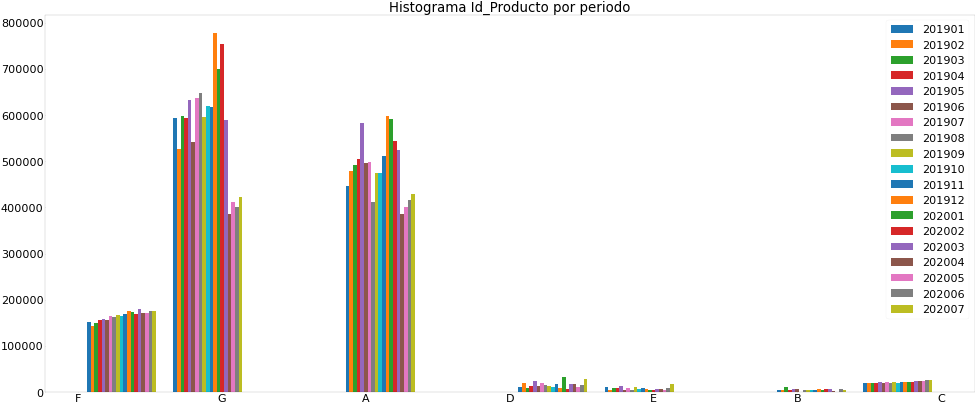

None

In [16]:
print(f'\t Producto')
display(histograma('Id_Producto'))

### Análisis de NaN

Solo hay nan en Fecha y signo

In [17]:
def prepro(dataset):
    print( "\t Describe Montos")
    display(dataset['Monto'])
    print( "\t Describe Categoricas")
    objec = dataset.select_dtypes(include=['object'])
    display(objec.describe())    

Veamos los nan de 'Signo':
- Todos corresponden a A-G, con distintos ID

In [18]:
print('\t 2020 07')
v=len(data['P_202007']["Signo"])
h=data['P_202007'][data['P_202007']["Signo"].isna()].shape[0]
hv=(h/v)*100
print(f'Dataset original tiene {v} datos, de los cuales {h} ({hv}%) son nan para Signo')
prepro(data['P_202007'][data['P_202007']["Signo"].isna()]) #Obtenemos un dataset de nan en signo y lo miramos
print('\t 2019 12')
v=len(data['P_201912']["Signo"])
h=data['P_201912'][data['P_201912']["Signo"].isna()].shape[0]
hv=(h/v)*100
print(f'Dataset original tiene {v} datos, de los cuales {h} ({hv}%) son nan para Signo')
prepro(data['P_201912'][data['P_201912']["Signo"].isna()])

	 2020 07
Dataset original tiene 1104493 datos, de los cuales 83533 (7.563017601741251%) son nan para Signo
	 Describe Montos


4         328813.00
32        188524.00
50        208485.00
51        327811.00
78        191355.00
             ...   
1104407   134714.00
1104437   171325.00
1104461   191421.00
1104468   130260.00
1104474   194358.00
Name: Monto, Length: 83533, dtype: float64

	 Describe Categoricas


,id,Id_Producto,Tipo,Producto-Tipo,Signo
count,83533,83533,83533,83533,0
unique,69783,1,1,1,0
top,13227,A,G,A-G,NaN
freq,8,83533,83533,83533,NaN


	 2019 12
Dataset original tiene 1597969 datos, de los cuales 82774 (5.179950299411315%) son nan para Signo
	 Describe Montos


4          294934.00
56        1282979.00
81         356250.00
82         262126.00
117        254207.00
             ...    
1597875    186865.00
1597899    196527.00
1597928    218295.00
1597959    189508.00
1597968    185393.00
Name: Monto, Length: 82774, dtype: float64

	 Describe Categoricas


,id,Id_Producto,Tipo,Producto-Tipo,Signo
count,82774,82774,82774,82774,0
unique,67176,1,1,1,0
top,6899,A,G,A-G,NaN
freq,7,82774,82774,82774,NaN


Todos los AG son NaN!

In [30]:
data['P_202007'][data['P_202007']["Signo"].notna() & (data['P_202007']["Producto-Tipo"]=='A-G')]

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo


In [ ]:
#Cantidad de nan en Signo por periodo:
nan_signo={}
for i in list(data.keys()):
    nan_signo[i]=data[i][data[i]["Signo"].isna()].shape[0]
    
display(nan_signo)
print(f'El total de nan de Signo es {sum(nan_signo.values())}')

Veamos los NaN de fecha:
- Hay distintos tipos de NaN en fecha, y son la mayoria de los datos.

In [ ]:
print('\t 2020 07')
v=len(data['P_202007']["Fecha"])
h=data['P_202007'][data['P_202007']["Fecha"].isna()].shape[0]
hv=(h/v)*100
print(f'Dataset original tiene {v} datos, de los cuales {h} ({hv}%) son nan para Fecha')
prepro(data['P_202007'][data['P_202007']["Fecha"].isna()]) #Obtenemos un dataset de nan en signo y lo miramos
print('\t 2019 12')
v=len(data['P_201912']["Fecha"])
h=data['P_201912'][data['P_201912']["Fecha"].isna()].shape[0]
hv=(h/v)*100
print(f'Dataset original tiene {v} datos, de los cuales {h} ({hv}%) son nan para Fecha')
prepro(data['P_201912'][data['P_201912']["Fecha"].isna()])

In [33]:
#Cantidad de nan en Signo por periodo:
nan_fecha={}
for i in list(data.keys()):
    nan_fecha[i]=data[i][data[i]["Fecha"].isna()].shape[0]
    
display(nan_fecha)
print(f'El total de nan de Fecha es {sum(nan_fecha.values())}')

{'P_201901': 1176523,
 'P_201902': 1070416,
 'P_201903': 1165301,
 'P_201904': 1177539,
 'P_201905': 1244613,
 'P_201906': 1081792,
 'P_201907': 1204174,
 'P_201908': 1202584,
 'P_201909': 1197830,
 'P_201910': 1198033,
 'P_201911': 1214916,
 'P_201912': 1467949,
 'P_202001': 1381464,
 'P_202002': 1381700,
 'P_202003': 1206312,
 'P_202004': 859659,
 'P_202005': 900240,
 'P_202006': 908168,
 'P_202007': 944809}

El total de nan de Fecha es 21984022


### Transacciones más comunes

In [34]:
quitando={}
for i in list(data.keys()):
    quitando[i]=data[i].drop(['Monto','id','Fecha','Periodo'],axis=1)
quitando.keys()

dict_keys(['P_201901', 'P_201902', 'P_201903', 'P_201904', 'P_201905', 'P_201906', 'P_201907', 'P_201908', 'P_201909', 'P_201910', 'P_201911', 'P_201912', 'P_202001', 'P_202002', 'P_202003', 'P_202004', 'P_202005', 'P_202006', 'P_202007'])

In [35]:
quitando['P_201901'].groupby(quitando['P_201901'].columns.tolist(),as_index=False).size().sort_values(by=['size'])

,Id_Producto,Tipo,Producto-Tipo,Signo,size
0,A,A,A-A,Positivo,979
3,B,B,B-B,Negativo,3979
7,D,F,D-F,Negativo,4827
9,E,F,E-F,Negativo,5324
8,E,E,E-E,Positivo,5375
2,A,L,A-L,Positivo,6679
6,D,E,D-E,Positivo,6945
4,C,C,C-C,Negativo,9783
5,C,D,C-D,Positivo,10397
10,F,D,F-D,Positivo,20563


In [36]:
#Quitantdo Id del consumidor y monto, que tipo de transacciones son las más comunes:
nan_fecha={}
for i in list(data.keys()):
    nan_fecha[i]=data[i][data[i]["Fecha"].isna()].shape[0]
    
display(nan_fecha)
print(f'El total de nan de Fecha es {sum(nan_fecha.values())}')

{'P_201901': 1176523,
 'P_201902': 1070416,
 'P_201903': 1165301,
 'P_201904': 1177539,
 'P_201905': 1244613,
 'P_201906': 1081792,
 'P_201907': 1204174,
 'P_201908': 1202584,
 'P_201909': 1197830,
 'P_201910': 1198033,
 'P_201911': 1214916,
 'P_201912': 1467949,
 'P_202001': 1381464,
 'P_202002': 1381700,
 'P_202003': 1206312,
 'P_202004': 859659,
 'P_202005': 900240,
 'P_202006': 908168,
 'P_202007': 944809}

El total de nan de Fecha es 21984022


### Añadamos variable de cuantas transacciones realizó el id X con su producto Y en el periodo i.

In [100]:
data_enumerate = dict(enumerate(periodos, 1))
data_enumerate
new_data={}
#Primero dataset base
for i in data_enumerate.keys(): #Variable numerica de cuantas transacciones realizó en periodo actual
    data[f"P_{data_enumerate[i]}"]['id-producto']=data[f"P_{data_enumerate[i]}"]['id'].astype(str)+"-"+data[f"P_{data_enumerate[i]}"]['Id_Producto']
    cuenta=data[f"P_{data_enumerate[i]}"].groupby(['id-producto'])['Monto'].count().to_frame() #Contar las transacciones
    cuenta['id-producto'] = cuenta.index #indice a columna para hacer merge
    cuenta.index.names = ['index'] #le cambiamos el nombre
    cuenta=cuenta.rename(columns={'Monto': 't_0'})#transacciones anteriores
    new_data[f"P_{data_enumerate[i]}"]=pd.merge(data[f"P_{data_enumerate[i]}"],cuenta,on='id-producto',how='left')#N° transacciones mes actual



In [101]:
def lag_n_ntrans(j):
    '''
    j: Orden del lag, ej: j=6, serían las transacciones a de 6 meses antes
    new_data:dataset en el que se trabajará
    '''
    for i in data_enumerate.keys(): #Variable numerica de cuantas transacciones realizó en periodo anterior
        if i>=(j+1):
            cuenta=data[f"P_{data_enumerate[i-j]}"].groupby(['id-producto'])['Monto'].count().to_frame() #Contar las transacciones periodo anterior de la persona y producto
            cuenta['id-producto'] = cuenta.index #indice a columna para hacer merge
            cuenta.index.names = ['index'] #le cambiamos el nombre
            cuenta=cuenta.rename(columns={'Monto': f't_i-{j}'})#transacciones anteriores
            new_data[f"P_{data_enumerate[i]}"]=pd.merge(new_data[f"P_{data_enumerate[i]}"],cuenta,on='id-producto',how='left')#N° transacciones mes anterior
        else:
            new_data[f"P_{data_enumerate[i]}"][f't_i-{j}']=np.nan #Igualmente creamos columna, pero vacía para periodos menores a j

In [102]:
lag_n_ntrans(1) #1 mes antes
lag_n_ntrans(2) #2 meses antes
lag_n_ntrans(3) #3 meses antes
lag_n_ntrans(4) #4 meses antes
lag_n_ntrans(5) #5 meses antes
lag_n_ntrans(6) #6 meses antes
display(new_data['P_201905'])
display(new_data['P_201909'])

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo,id-producto,t_0,t_i-1,t_i-2,t_i-3,t_i-4
0,1,F,D,F-D,Positivo,291428.56,NaT,201905,1-F,3,3.00,3.00,2.00,3.00
1,1,F,H,F-H,Negativo,291428.56,NaT,201905,1-F,3,3.00,3.00,2.00,3.00
2,1,F,J,F-J,Positivo,291428.56,NaT,201905,1-F,3,3.00,3.00,2.00,3.00
3,1,G,K,G-K,Negativo,122618.57,NaT,201905,1-G,2,5.00,6.00,4.00,5.00
4,1,G,K,G-K,Negativo,122138.57,NaT,201905,1-G,2,5.00,6.00,4.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436186,79538,A,K,A-K,Negativo,122555.71,NaT,201905,79538-A,3,4.00,8.00,1.00,6.00
1436187,79538,A,K,A-K,Negativo,122714.29,NaT,201905,79538-A,3,4.00,8.00,1.00,6.00
1436188,79539,C,D,C-D,Positivo,693074.44,2019-05-24,201905,79539-C,2,2.00,1.00,NaN,2.00
1436189,79539,C,C,C-C,Negativo,691840.00,2019-05-24,201905,79539-C,2,2.00,1.00,NaN,2.00


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo,id-producto,t_0,t_i-1,t_i-2,t_i-3,t_i-4,t_i-5,t_i-6
0,1,F,D,F-D,Positivo,548571.44,NaT,201909,1-F,3,4.00,3.00,3.00,3.00,3.00,3.00
1,1,F,H,F-H,Negativo,548571.44,NaT,201909,1-F,3,4.00,3.00,3.00,3.00,3.00,3.00
2,1,F,J,F-J,Positivo,548571.44,NaT,201909,1-F,3,4.00,3.00,3.00,3.00,3.00,3.00
3,1,G,K,G-K,Negativo,122108.57,NaT,201909,1-G,1,4.00,3.00,2.00,2.00,5.00,6.00
4,1,A,K,A-K,Negativo,131428.58,NaT,201909,1-A,9,9.00,12.00,34.00,26.00,25.00,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285484,79539,C,D,C-D,Positivo,700188.69,2019-09-26,201909,79539-C,2,2.00,2.00,2.00,2.00,2.00,1.00
1285485,79539,C,C,C-C,Negativo,697798.44,2019-09-26,201909,79539-C,2,2.00,2.00,2.00,2.00,2.00,1.00
1285486,79539,E,F,E-F,Negativo,120714.00,2019-09-25,201909,79539-E,1,NaN,NaN,NaN,1.00,1.00,NaN
1285487,79539,F,H,F-H,Negativo,120000.00,NaT,201909,79539-F,2,1.00,2.00,1.00,NaN,2.00,1.00


In [103]:
new_data['P_201907'].corr()

,Monto,Periodo,t_0,t_i-1,t_i-2,t_i-3,t_i-4,t_i-5,t_i-6
Monto,1.00,NaN,-0.06,-0.05,-0.06,-0.05,-0.05,-0.05,-0.05
Periodo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_0,-0.06,NaN,1.00,0.81,0.81,0.79,0.77,0.75,0.75
t_i-1,-0.05,NaN,0.81,1.00,0.86,0.84,0.81,0.79,0.78
t_i-2,-0.06,NaN,0.81,0.86,1.00,0.87,0.84,0.81,0.81
t_i-3,-0.05,NaN,0.79,0.84,0.87,1.00,0.87,0.82,0.82
t_i-4,-0.05,NaN,0.77,0.81,0.84,0.87,1.00,0.85,0.83
t_i-5,-0.05,NaN,0.75,0.79,0.81,0.82,0.85,1.00,0.84
t_i-6,-0.05,NaN,0.75,0.78,0.81,0.82,0.83,0.84,1.00


In [107]:
new_data['P_201907'][f'delta{j}']=(new_data['P_201907'][f't_i-{j}']-new_data['P_201907'][f't_i-{j+1}'])/new_data['P_201907'][f't_i-{j}']

In [106]:
j=1

In [108]:
new_data['P_201907']

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo,id-producto,t_0,t_i-1,t_i-2,t_i-3,t_i-4,t_i-5,t_i-6,delta1
0,1,F,D,F-D,Positivo,262857.16,NaT,201907,1-F,3,3.00,3.00,3.00,3.00,2.00,3.00,0.00
1,1,F,H,F-H,Negativo,262857.16,NaT,201907,1-F,3,3.00,3.00,3.00,3.00,2.00,3.00,0.00
2,1,F,J,F-J,Positivo,262857.16,NaT,201907,1-F,3,3.00,3.00,3.00,3.00,2.00,3.00,0.00
3,1,G,K,G-K,Negativo,124128.57,NaT,201907,1-G,3,2.00,2.00,5.00,6.00,4.00,5.00,0.00
4,1,G,K,G-K,Negativo,122988.71,NaT,201907,1-G,3,2.00,2.00,5.00,6.00,4.00,5.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351456,79538,A,K,A-K,Negativo,120514.29,NaT,201907,79538-A,5,4.00,3.00,4.00,8.00,1.00,6.00,0.25
1351457,79539,C,D,C-D,Positivo,696369.12,2019-07-25,201907,79539-C,2,2.00,2.00,2.00,1.00,NaN,2.00,0.00
1351458,79539,C,C,C-C,Negativo,694943.44,2019-07-25,201907,79539-C,2,2.00,2.00,2.00,1.00,NaN,2.00,0.00
1351459,79539,F,H,F-H,Negativo,120000.00,NaT,201907,79539-F,2,1.00,NaN,2.00,1.00,1.00,1.00,NaN


In [105]:
new_data['P_201907']

,id,Id_Producto,Tipo,Producto-Tipo,Signo,Monto,Fecha,Periodo,id-producto,t_0,t_i-1,t_i-2,t_i-3,t_i-4,t_i-5,t_i-6
0,1,F,D,F-D,Positivo,262857.16,NaT,201907,1-F,3,3.00,3.00,3.00,3.00,2.00,3.00
1,1,F,H,F-H,Negativo,262857.16,NaT,201907,1-F,3,3.00,3.00,3.00,3.00,2.00,3.00
2,1,F,J,F-J,Positivo,262857.16,NaT,201907,1-F,3,3.00,3.00,3.00,3.00,2.00,3.00
3,1,G,K,G-K,Negativo,124128.57,NaT,201907,1-G,3,2.00,2.00,5.00,6.00,4.00,5.00
4,1,G,K,G-K,Negativo,122988.71,NaT,201907,1-G,3,2.00,2.00,5.00,6.00,4.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351456,79538,A,K,A-K,Negativo,120514.29,NaT,201907,79538-A,5,4.00,3.00,4.00,8.00,1.00,6.00
1351457,79539,C,D,C-D,Positivo,696369.12,2019-07-25,201907,79539-C,2,2.00,2.00,2.00,1.00,NaN,2.00
1351458,79539,C,C,C-C,Negativo,694943.44,2019-07-25,201907,79539-C,2,2.00,2.00,2.00,1.00,NaN,2.00
1351459,79539,F,H,F-H,Negativo,120000.00,NaT,201907,79539-F,2,1.00,NaN,2.00,1.00,1.00,1.00


Lo pasamos a cambio porcentual, es decir (t_i-2 - t_i-1)/t_i-2

In [ ]:
data = {}# Para leer los .csv
size={}
for filename in periodos:
    data[f"P_{filename}"] = pd.read_csv('Datos/raw/transaction_subset/'+f"P_{filename}"+'.csv')
    size[f"P_{filename}"]=data[f"P_{filename}"].shape[0]